In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

# EDA

In [25]:
numeric_columns = [
    "battery_power",
    "clock_speed",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "n_cores",
    "pc",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
]
categorical_columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
target_column = "price_range"
data = data[numeric_columns + categorical_columns + [target_column]]
data[categorical_columns] = data[categorical_columns].astype("category")
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,1,0,0,1,0,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,0,1,1,1,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   clock_speed    2000 non-null   float64 
 2   fc             2000 non-null   int64   
 3   int_memory     2000 non-null   int64   
 4   m_dep          2000 non-null   float64 
 5   mobile_wt      2000 non-null   int64   
 6   n_cores        2000 non-null   int64   
 7   pc             2000 non-null   int64   
 8   px_height      2000 non-null   int64   
 9   px_width       2000 non-null   int64   
 10  ram            2000 non-null   int64   
 11  sc_h           2000 non-null   int64   
 12  sc_w           2000 non-null   int64   
 13  talk_time      2000 non-null   int64   
 14  blue           2000 non-null   category
 15  dual_sim       2000 non-null   category
 16  four_g         2000 non-null   category
 17  three_g        2000 non-null   ca

In [27]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


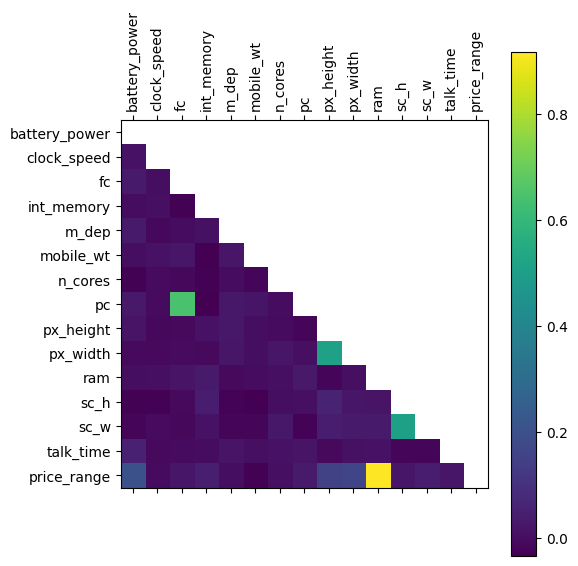

In [28]:
corr = data[numeric_columns + [target_column]].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = None

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

matrix_plot = ax.matshow(corr, cmap="viridis")
ax.set_xticks(range(corr.shape[0]), corr.index, rotation=90)
ax.set_yticks(range(corr.shape[0]), corr.index)

fig.colorbar(matrix_plot)
fig.tight_layout()
fig.show()

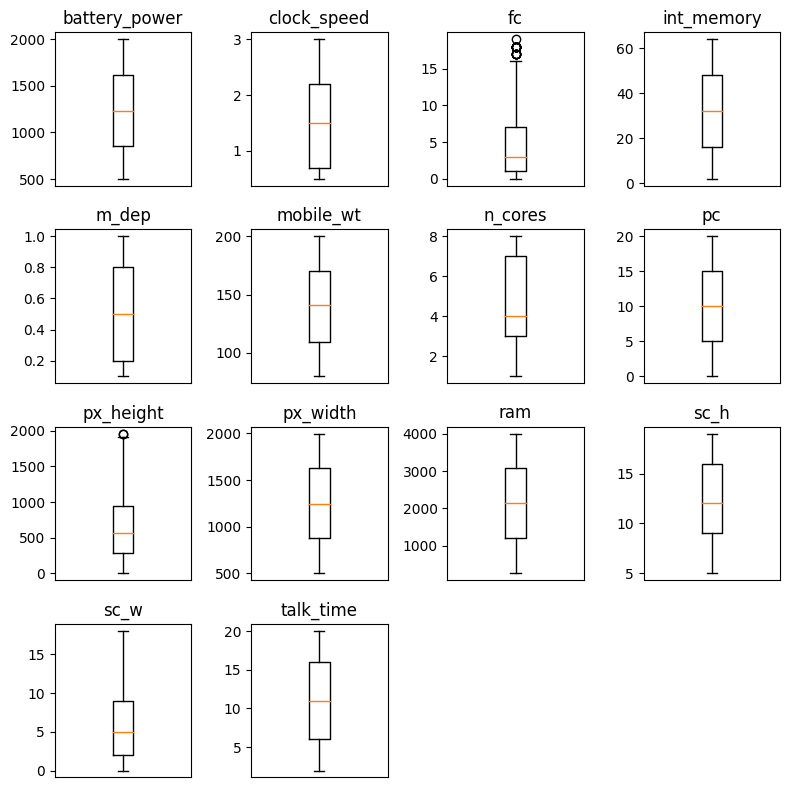

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
axes = axes.flatten()

for ax, column_name in zip(axes, numeric_columns):
    ax.boxplot(data[column_name])
    ax.set_xticks([])
    ax.set_title(column_name)

for ax in axes[-(len(axes) - len(numeric_columns)):]:
    ax.axis("off")

fig.tight_layout()
fig.show()

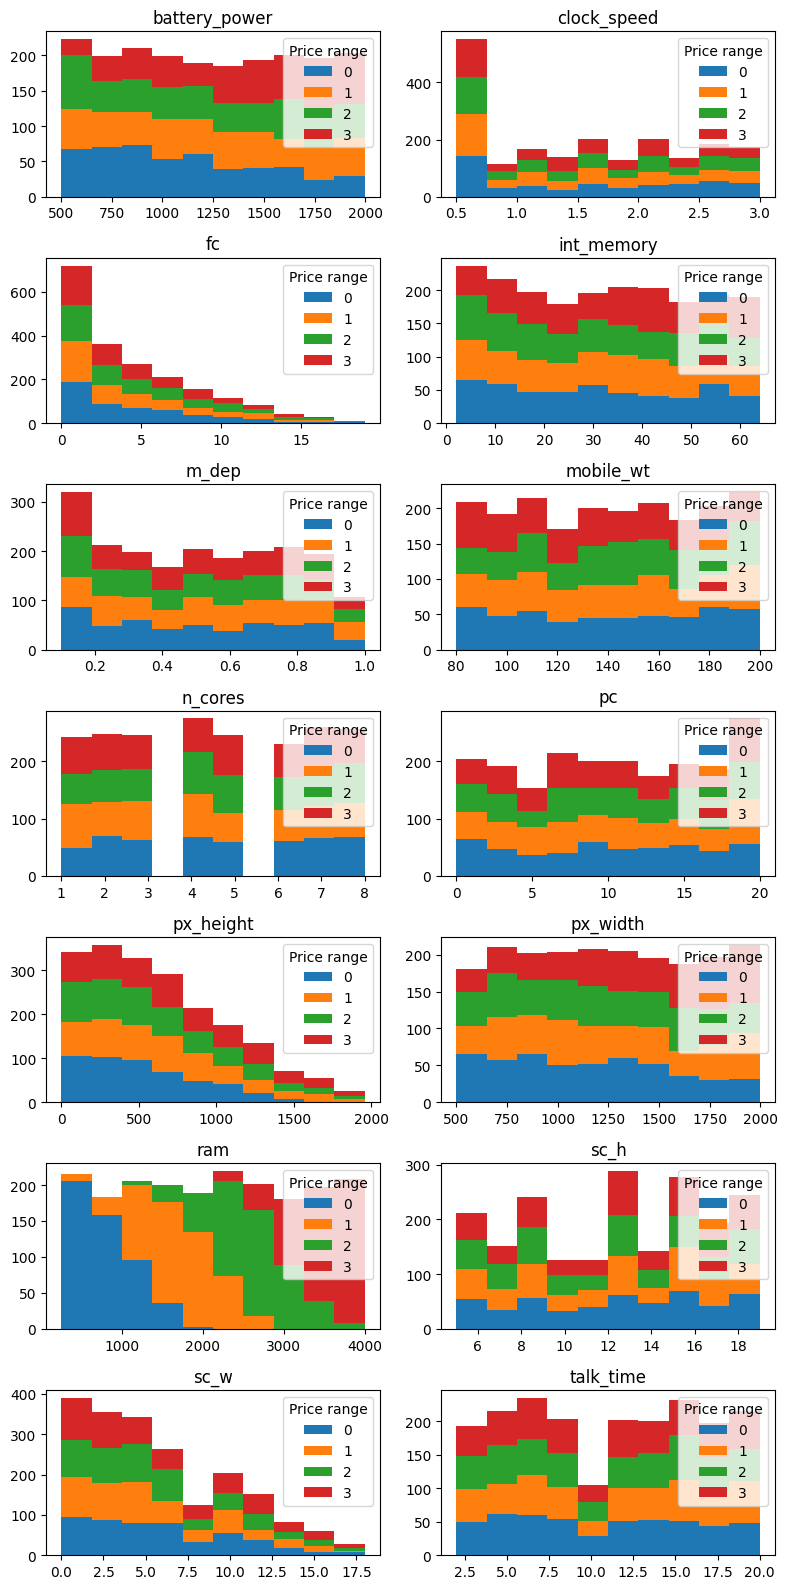

In [30]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16))
axes = axes.flatten()
data_by_price_range = data.groupby("price_range", observed=True)

for ax, column_name in zip(axes, numeric_columns):
    ax.hist([x[1][column_name] for x in data_by_price_range], stacked=True, label=[x[0] for x in data_by_price_range])
    ax.set_title(column_name)
    ax.legend(title="Price range", loc="upper right")

fig.tight_layout()
fig.show()

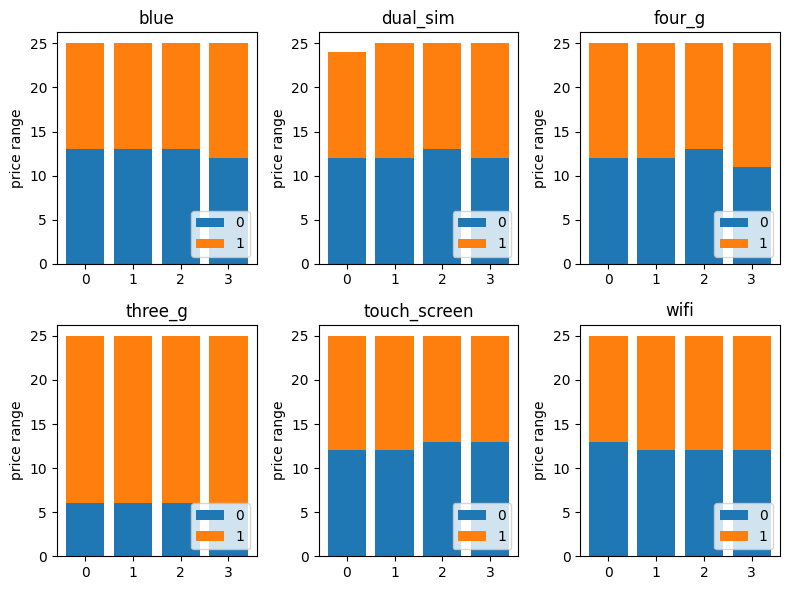

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes = axes.flatten()

for ax, column_name in zip(axes, categorical_columns):
    value_counts = data.groupby(column_name, observed=True)["price_range"].value_counts()
    value_counts = (value_counts / len(data) * 100).round()
    value_counts = value_counts.sort_index()
        
    ax.bar(value_counts.loc[0].index.astype(str), value_counts.loc[0], label="0")
    ax.bar(value_counts.loc[1].index.astype(str), value_counts.loc[1], bottom=value_counts.loc[0], label="1")
    
    ax.set_title(column_name)
    ax.set_ylabel("%")
    ax.set_ylabel("price range")
    ax.legend(loc="lower right")

fig.tight_layout()
fig.show()

In [32]:
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 97.56% 
    test set:  97.50% 


# Decision Tree

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 100.00% 
    test set:  83.25% 


In [35]:
param_grid = {
    'max_depth': [None, 2, 4, 8, 16, 32],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier()
search = GridSearchCV(model, param_grid, cv=5)
search.fit(X_train, y_train)

print(f"Best score: {search.best_score_ * 100:.2f}%")
print("Best params:", search.best_params_)

model = search.best_estimator_

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}%")
print(f"    test set:  {test_accuracy:.2f}%")

Best score: 85.87%
Best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Model accuracy:
    train set: 96.62%
    test set:  85.50%


# Random Forest

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 100.00% 
    test set:  87.25% 


# Gradient Boosting

In [37]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 99.94% 
    test set:  90.50% 
